UFCG/CEEI/DEE - Campus de Campina Grande - Disciplina: Controle Analógico

Primeira avaliação - Atividade 3 - Período: 2021.1 - Professor: Saulo O. D. Luiz

**Nome: Filipe Soares Donato**

**Matrícula: 120111402**

Caros alunos e alunas,

Crie uma cópia deste notebook do colab por meio do menu Arquivo / Salvar uma cópia no Drive, e inclua seu nome e matrícula no nome do notebook.

Os itens identificados como (Cálculos à mão) devem ser respondidos à mão no papel ou mesa digitalizadora. É possível anexar a imagem digitalizada neste notebook do colab, ou fazer upload de um pdf na atividade. Por favor não anexem jpg ou png.

Os demais itens podem ser respondidos na forma de código no Python, resultados de cálculos e simulações nas células identificadas como (#Resposta), e texto nas células identificadas como (Resposta) neste notebook do colab.

Realize upload do notebook como arquivo do seu Drive. Por favor, não faça upload do link do arquivo.

Boa sorte!

In [34]:
pip install control #Instalação da biblioteca de sistemas de controle do Python

Um mecanismo é usado para auxiliar a parada de aeronaves num porta-a-viões, como apresentado na Figura 1.

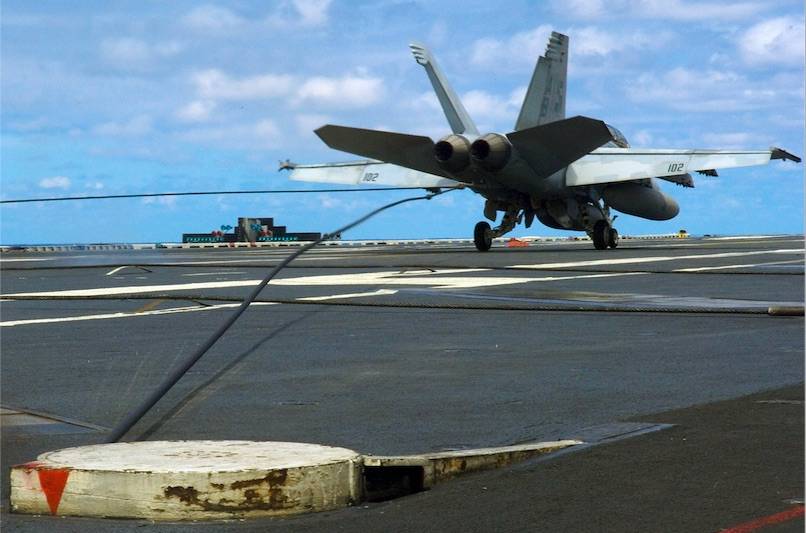

Figura 1: Fonte: imgur. Disponível em: http://i.stack.imgur.com/qWlm0.jpg. Acesso em: 1 ago. 2021. 

Considere um modelo simplificado desse mecanismo na Figura 2. A elasticidade dos cabos é modelada por uma mola de constante de elasticidade $k=1890N/m$. É usado um amortecedor com coeficiente de atrito viscoso $b$. A distância da aeronave ao local de engate é representado pela posição $x$. A massa da aeronave é $m=21000kg$. Não há outras forças além da força elástica e da força do atrito viscoso. A posição inicial da aeronave no ponto de engate é $x(0) = 0$, e a velocidade inicial da aeronave é $\dot{x}(0)=60m/s$.

(a) (1,0 ponto) (Cálculos à mão) Determine a equação diferencial que representam o sistema e a transformada de Laplace da posição $x$.

(b) (0,5 ponto) (Cálculos à mão) Determine o coeficiente de atrito viscoso $b$ tal que os polos do sistema sejam iguais a -0,05 e -1,8.

(c) (0,5 ponto) Simule o sistema, e apresente a saída $x$ e a velocidade $\dot{x}$.

(d) (0,5 ponto) Quais são as suas conclusões sobre o regime transitório de cada estado? Relacione essas conclusões com a dinâmica do sistema.

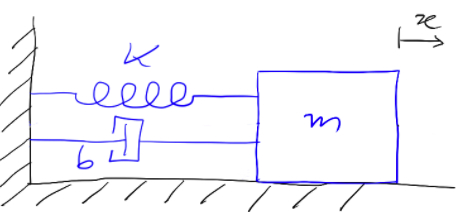

Figura 2: Modelo do mecanismo de parada de aeronaves num porta-aviões.

😃**Resposta Letra A em anexo**

😃**Resposta Letra B em anexo**

😃**Resposta Letra C abaixo**

O valor de b = 38850.0


A = [[ 0.    1.  ]
     [-0.09 -1.85]]

B = [[0.00000000e+00]
     [4.76190476e-05]]

C = [[1. 0.]]

D = [[0.]]




2.22e-16 s + 4.762e-05
----------------------
 s^2 + 1.85 s + 0.09



Zeros do sistema: []

Polos do sistema: [-0.05 -1.8 ]






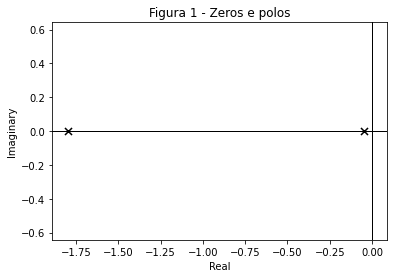

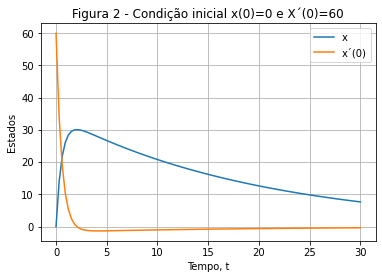

In [35]:
#Resposta Letra C
#Importar as bibliotecas
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt


#Definir as variáveis que encontramos e temos
m = 21000
k = 1890
p1 = 0.05
p2 = 1.8
b = m*(p1+p2)
print('O valor de b =',b)
print('\n')

#Escrever as matrizes
A = matrix([[ 0,      1],
            [-k/m, -b/m]])
B = matrix([[0],
            [1/m]])
c = matrix([[1, 0]])
d = matrix([0])

#Escrever minha função Hss
Hss=ss(A, B, c, d)
print(Hss)  #Mostrar pra ver se está certo
#Transformada de Laplaca
H = tf(Hss)
print('\n')
print(H) #Imprime a T de Laplace e vê que bateu com o do caderno

#Encontrar os zeros e polos da função transferência
print('\n')
print('Zeros do sistema:', zero(Hss))
print('\nPolos do sistema:', pole(Hss))
print('\n')

#Fazer o gráfico na localização
p, z = pzmap(Hss) 
plt.title('Figura 1 - Zeros e polos')
print('\n')

#Função
def f(x,t):
    dxdt = [0, 0]
    dxdt[0] = x[1]
    dxdt[1] = (-b/m*x[1])-(k/m*x[0])
    return dxdt

#Condição inicial
x0 = [0.0, 60.0]

#Vetor t
t = np.linspace(0,30,num=100)

#Equação diferencial ordinária
x = odeint(f,x0,t)

# Apresentar os resultados
plt.figure(2)
plt.plot(t,x) 
plt.legend(['x','x´(0)'])
plt.xlabel('Tempo, t') 
plt.title('Figura 2 - Condição inicial x(0)=0 e X´(0)=60')
plt.ylabel('Estados')
plt.grid(True)
plt.show()
#Fim do código


😃**Resposta Letra D**

Para o tempo 0, a posição inicia na origem e a velocidade é 60 m/s.

A velocidade decresce devido a força da mola e do amortecedor até chegar a 0, e depois fica com um pequeno valor negativo, voltando lentamente a zero à medida que o avião chega no regime permanente.

Já para a posição(x) vemos que ela cresce inicialmente e depois decresce. A mola é quem puxa para que a massa volte a posição x=0. Percebi no gráfico um  valor máximo de 30m que o ponto quando a velocidade é 0.

